In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Collecting & Understanding Data**

In [ ]:
data = pd.read_csv('bike_rent.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32


In [ ]:
data.shape

(17379, 17)

In [ ]:
data.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


From the above description of the column data types we can see that the 'dteday' is declared to be datetime but instead it is object type. Similarly, the columns like 'season', 'year', 'month', 'holiday',  'weekday', 'workingday', 'weathersit' has to be in categorical datatype but was found to be object.

In [ ]:
#Converting the datatypes into categorical and date time
categorical_variable = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for var in categorical_variable:
    data[var] = data[var].astype("category")
    
#Converting dteday into date time 
data['dteday']=pd.to_datetime(data.dteday)


# **Cleaning Data**

In [ ]:
data = data.replace('?', np.nan) # replace all occurrences of "?" with ' ' in the DataFrame

In [ ]:
data.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

Data Imputation

1.For numerical type data , we replace the null values with mean/median.

2.For categorical type data , we replace the null values with mode.

In [ ]:
data['hum'] = pd.to_numeric(data['hum'], errors='coerce')
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce')
data['casual'] = pd.to_numeric(data['casual'], errors='coerce')
data['registered'] = pd.to_numeric(data['registered'], errors='coerce')
data['cnt'] = pd.to_numeric(data['cnt'], errors='coerce')
data['temp'] = pd.to_numeric(data['temp'], errors='coerce')
data['atemp'] = pd.to_numeric(data['atemp'], errors='coerce')

In [ ]:
data['hum'].fillna(data['hum'].mean(), inplace=True)
data['atemp'].fillna(data['atemp'].mean(), inplace=True)
data['windspeed'].fillna(data['windspeed'].mean(), inplace=True)
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['registered'].fillna(data['registered'].mean(), inplace=True)
data['casual'].fillna(data['casual'].mean(), inplace=True)

In [ ]:
data['season'].fillna(data['season'].mode()[0], inplace=True)
data['yr'].fillna(data['yr'].mode()[0], inplace=True)
data['mnth'].fillna(data['mnth'].mode()[0], inplace=True)
data['holiday'].fillna(data['holiday'].mode()[0], inplace=True)
data['workingday'].fillna(data['workingday'].mode()[0], inplace=True)
data['weathersit'].fillna(data['weathersit'].mode()[0], inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

From the above output we can say that the missing values are been replaced with their mode/mean and also indicates no other missing values.

# ***Data Visualization*** 

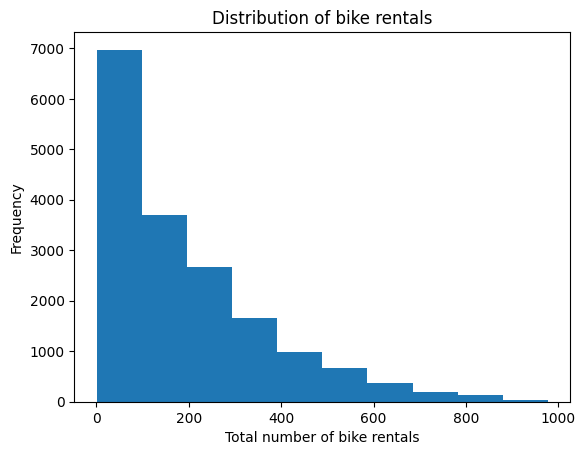

In [ ]:
plt.hist(data['cnt'])
plt.xlabel('Total number of bike rentals')
plt.ylabel('Frequency')
plt.title('Distribution of bike rentals')
plt.show()

The histogram graph tells that the distribution of target variable is not normal instead it is right skewed. Meaning majority of the data is concentrated on right side of distribution and left side data is populated

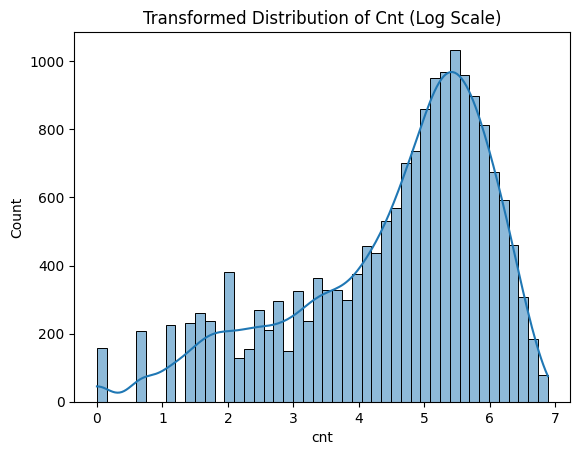

In [ ]:
#Treating the left skewed data
# log transform the cnt variable
data['cnt'] = np.log(data['cnt'])

# plot the transformed distribution
sns.histplot(data=data, x='cnt', kde=True)
plt.title('Transformed Distribution of Cnt (Log Scale)')
plt.show()


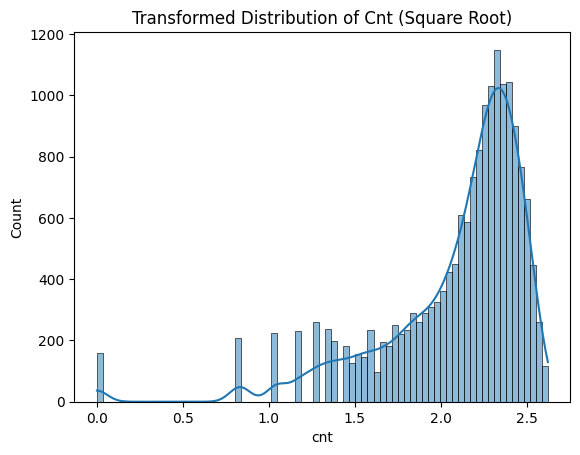

In [ ]:
sns.histplot(data=data, x=np.sqrt(data['cnt']), kde=True)
plt.title('Transformed Distribution of Cnt (Square Root)')
plt.show()

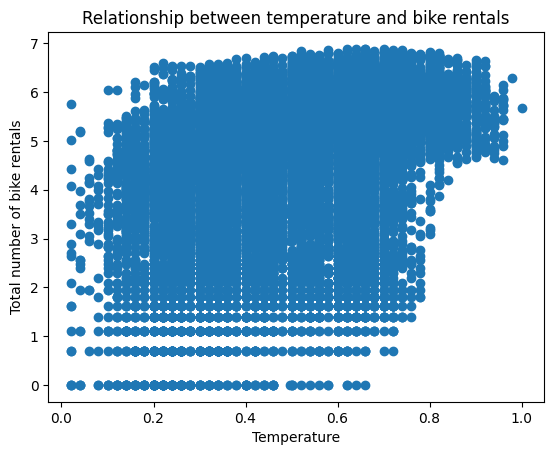

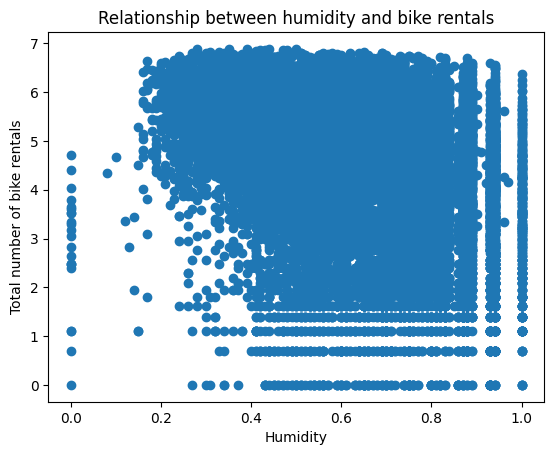

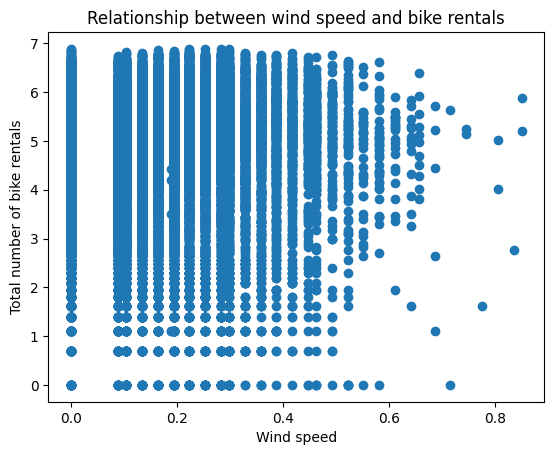

In [ ]:
#Finding the relationship of weather conditions and count variable
plt.scatter(data['temp'], data['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Total number of bike rentals')
plt.title('Relationship between temperature and bike rentals')
plt.show()

plt.scatter(data['hum'], data['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Total number of bike rentals')
plt.title('Relationship between humidity and bike rentals')
plt.show()

plt.scatter(data['windspeed'], data['cnt'])
plt.xlabel('Wind speed')
plt.ylabel('Total number of bike rentals')
plt.title('Relationship between wind speed and bike rentals')
plt.show()

1. The scatterplot graph for 'temp' and 'cnt' shows a **positive** linear relationship, which means that as the temperature increases, the count of rental bikes also tends to increase.

2. The scatterplot graph for 'hum' and 'cnt' shows a **negative** linear relationship, which means that as the humidity increases, the count of rental bikes tends to decrease.

3. The scatterplot graph for 'windspeed' and 'cnt' shows a weak **no correlation** relationship, which means that the windspeed is not related to target variable.

# **Monthly Distribution**

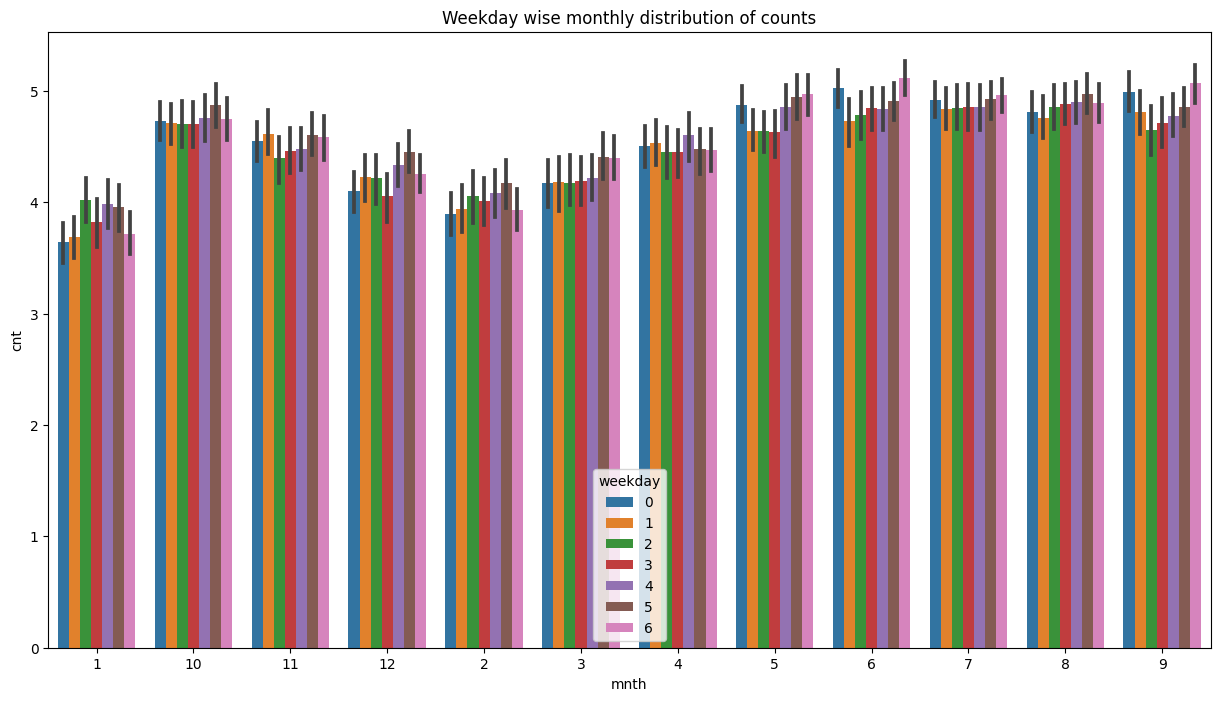

In [ ]:
#plotting bar plots for weekday wise monthly distribution
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','weekday']],hue='weekday',ax=ax)
ax.set_title('Weekday wise monthly distribution of counts')
plt.show()

We can see that the rental counts are higher on weekdays as compared to weekends, with the highest counts on Thursdays and Fridays. 

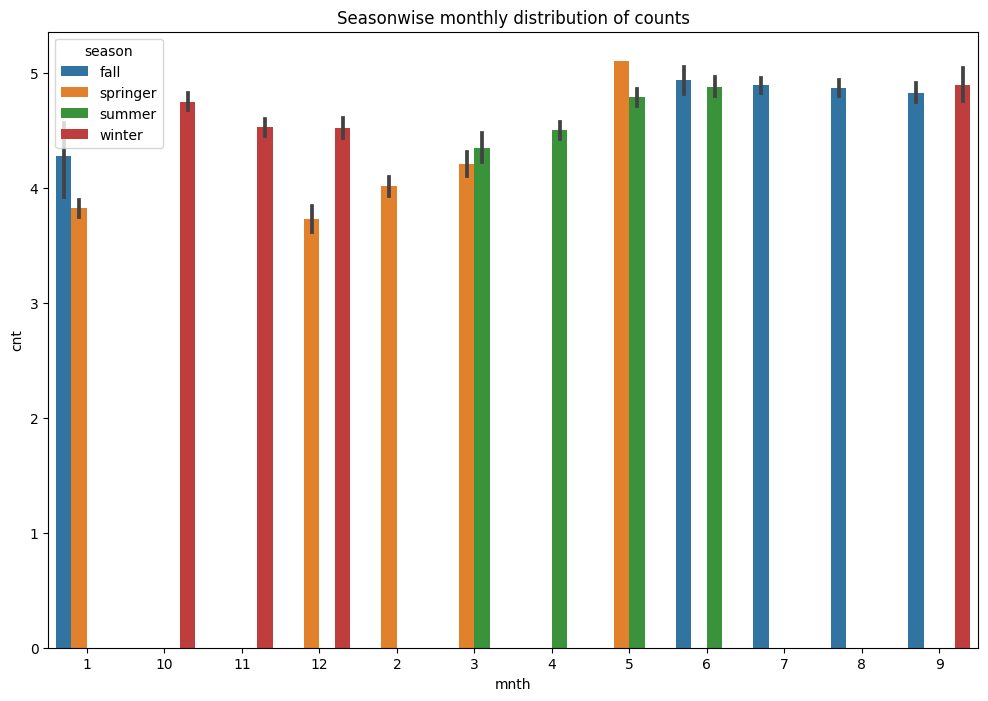

In [ ]:
##plotting bar plots for seasonal wise monthly distribution
fig,ax1=plt.subplots(figsize=(12,8))
sns.barplot(x='mnth',y='cnt',data=data[['mnth','cnt','season']],hue='season',ax=ax1)
ax1.set_title('Seasonwise monthly distribution of counts')
plt.show()

From the above graph , the seasons are splitted into 1 -> spring 
2 -> summer
3 -> fall
4 -> winter

We can see that the bike rental counts are higher in the **summer and fall seasons**, with the highest counts in July, August, September and October. On the other hand, the rental counts are lower in the months of **December and january**. This suggests that the demand for bikes is higher during the warmer months, possibly due to better weather conditions and more opportunities for outdoor activities.

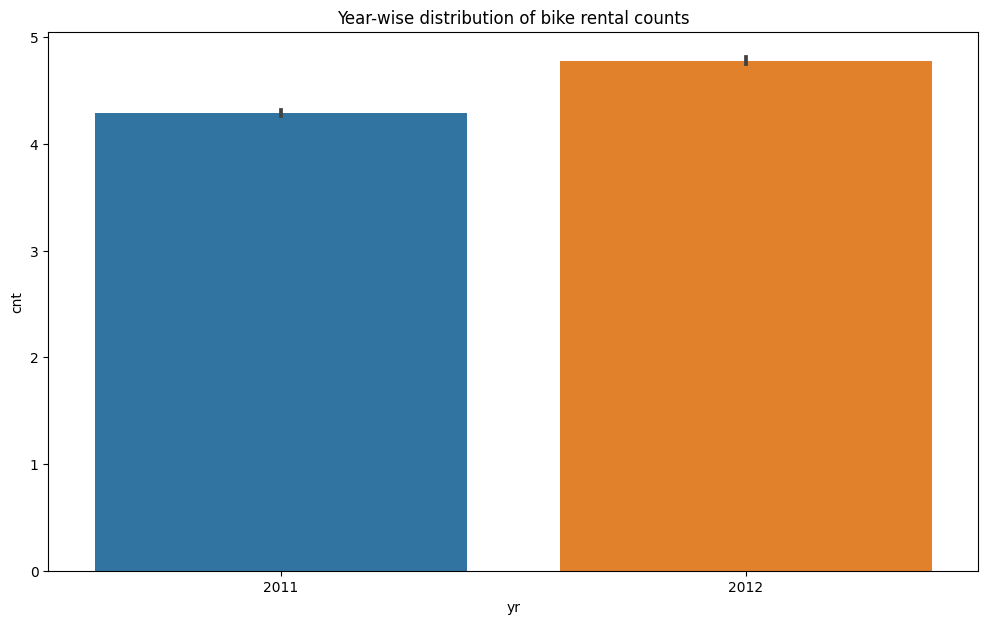

In [ ]:
#Yearly distribution
fig, ax2 = plt.subplots(figsize=(12,7))
sns.barplot(x='yr', y='cnt', data=data)
ax2.set_title('Year-wise distribution of bike rental counts')
plt.show()

From the above plot , the demand for the bike got increased in the year 2012.

# **Working day wise distribution of count**

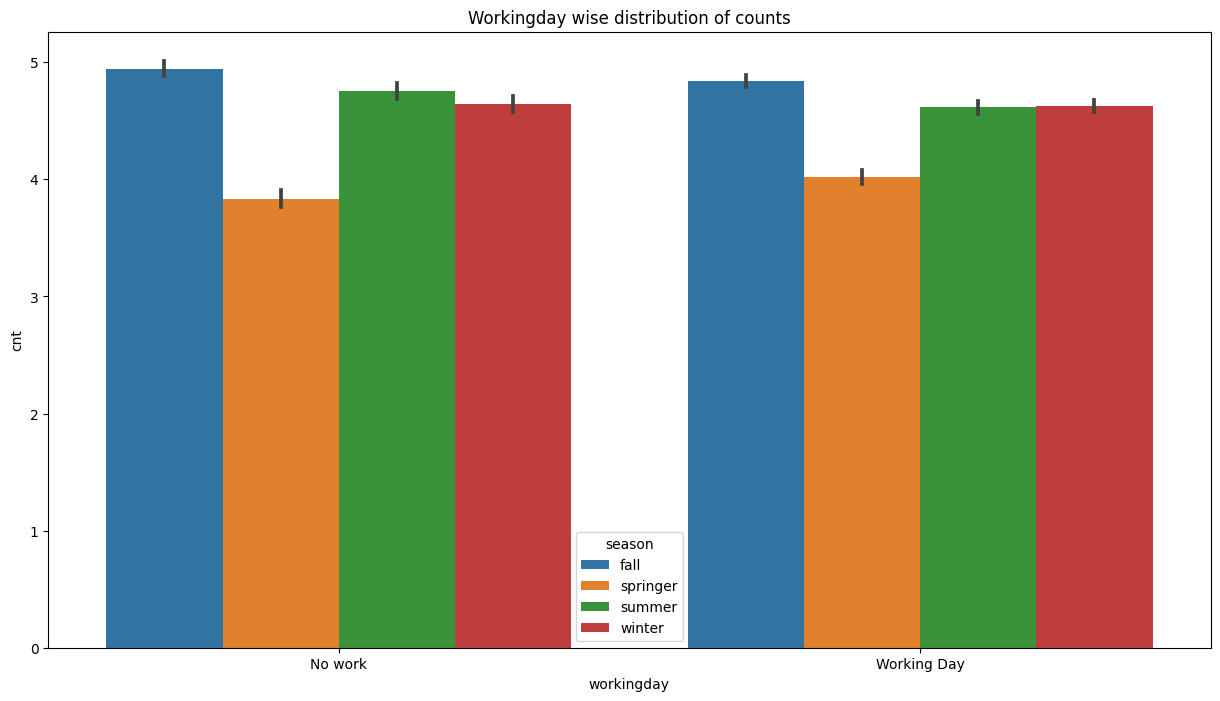

In [ ]:
fig,ax3=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=data,x='workingday',y='cnt',hue='season')
ax3.set_title('Workingday wise distribution of counts')
plt.show()

Overall from the above graph, it is observed that the bike rental count is more on working days mostly seen in the fall season.

# **Holiday wise distribution**

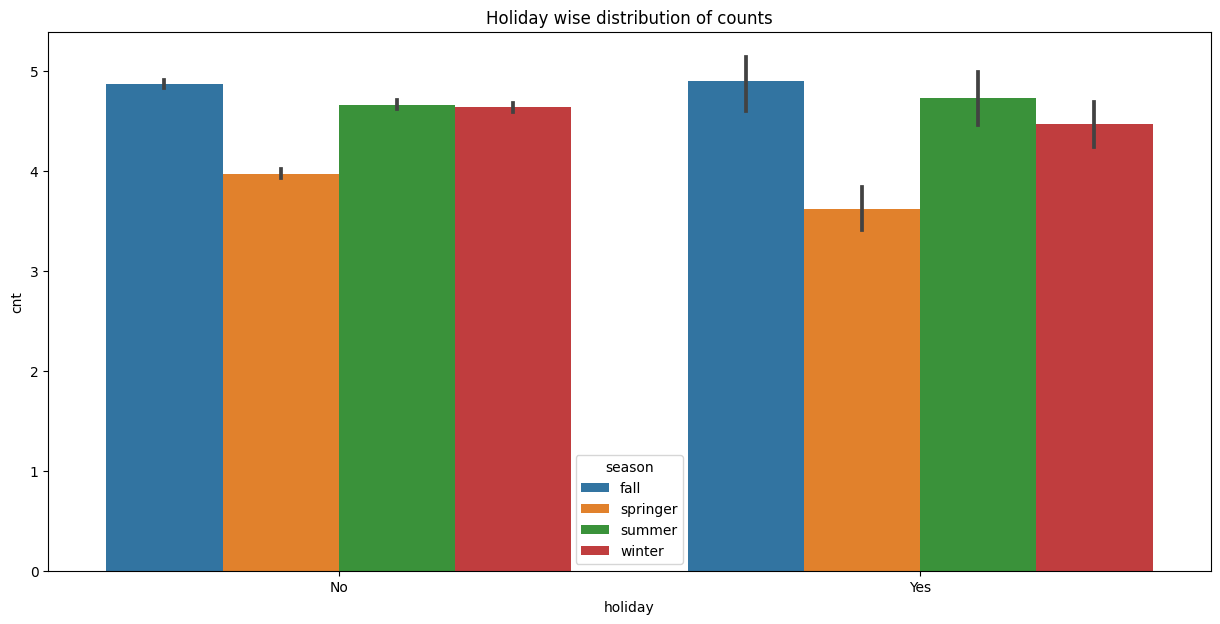

In [ ]:
fig,ax4=plt.subplots(figsize=(15,7))
#Barplot for Holiday distribution of counts
sns.barplot(data=data,x='holiday',y='cnt',hue='season')
ax4.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

# **Weather wise distribution**

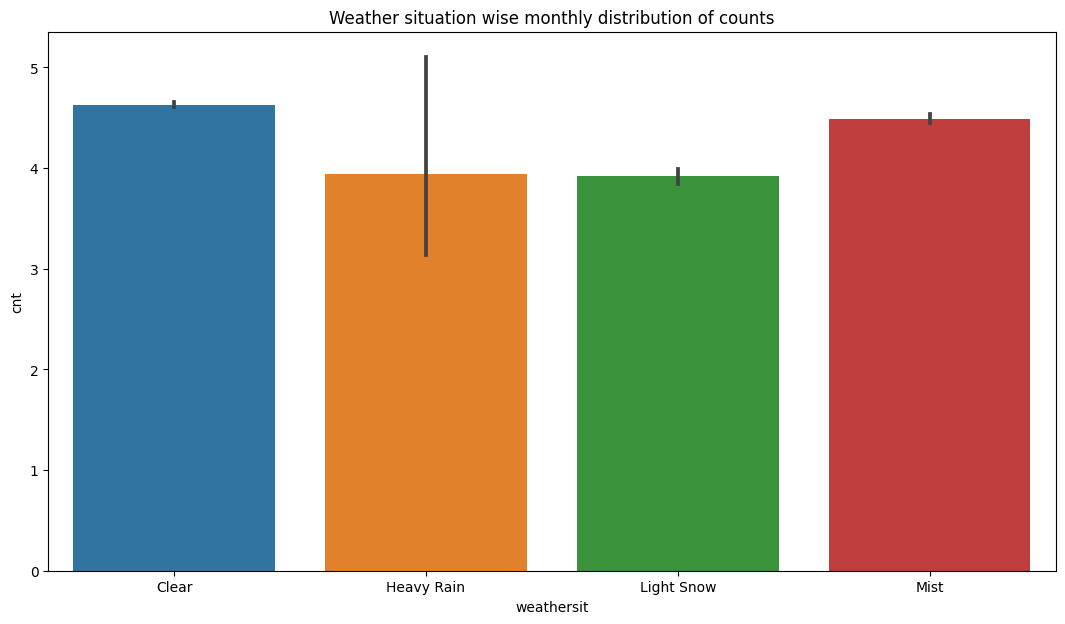

In [ ]:
fig,ax5=plt.subplots(figsize=(13,7))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weathersit',y='cnt',data=data[['mnth','cnt','weathersit']],ax=ax5)
ax5.set_title('Weather situation wise monthly distribution of counts')
plt.show()

The graph depicts that during clear sky weather condition the count of bikes rented are more than the other weather conditions.

# **Detecting outliers**

[Text(0.5, 0, 'workingday'),
 Text(0, 0.5, 'cnt'),
 Text(0.5, 1.0, 'Boxplot for cnt vs workingday')]

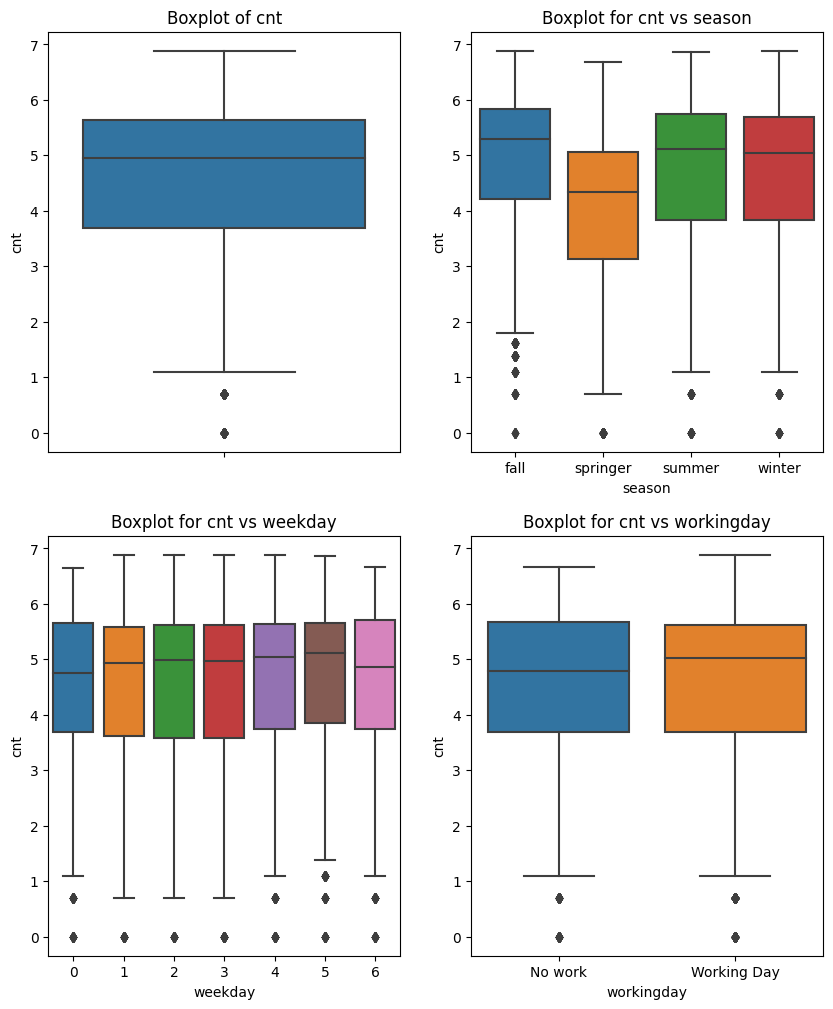

In [ ]:
#Detecting outliers for cnt , workingday , weekday , season 
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,12)
sns.boxplot(data=data,y="cnt",orient='v',ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="season",orient='v',ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='cnt',title = "Boxplot of cnt")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")

The boxplot helps in detecting the outliners in the particuar attribute. The above graph clearly says that there are outliners in cnt , season , weekday and working day columns.

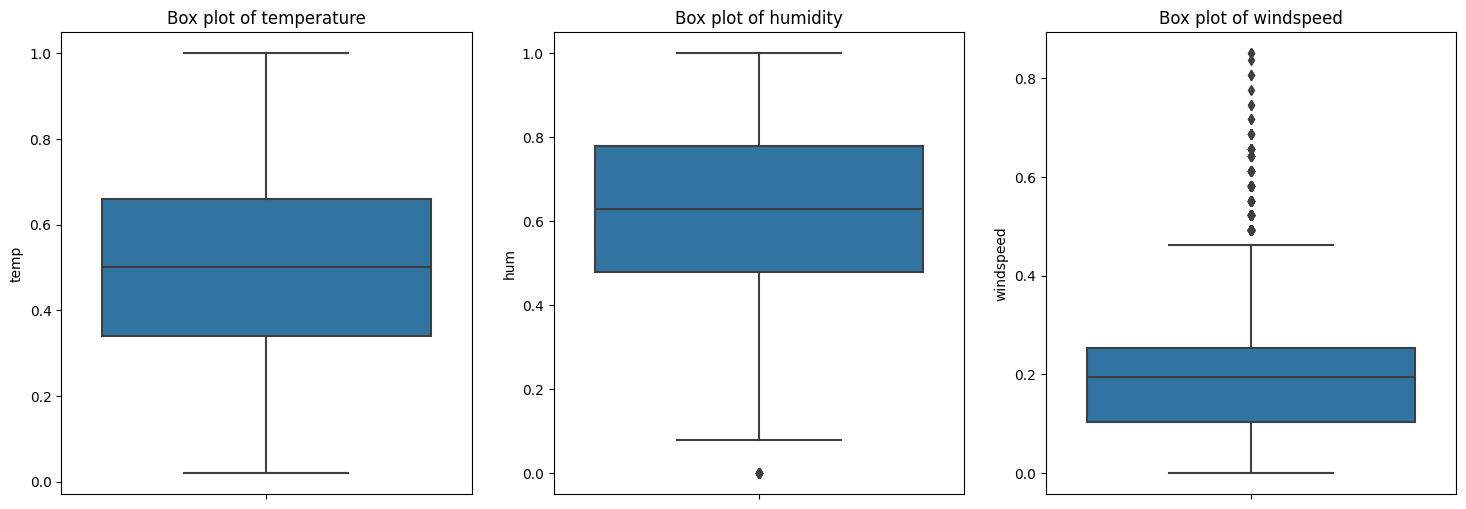

In [ ]:
#Detecting outliers for temp , hum , windspeed
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.boxplot(y=data['temp'], ax=axes[0])
axes[0].set_title('Box plot of temperature')

sns.boxplot(y=data['hum'], ax=axes[1])
axes[1].set_title('Box plot of humidity')

sns.boxplot(y=data['windspeed'], ax=axes[2])
axes[2].set_title('Box plot of windspeed')

plt.show()

We can say that the outliners are present in the windspeed and humidity column

# **Replace the outliers**

Capping is commonly used to handle outliers in a dataset. Outliers are extreme values that are much larger or smaller than the majority of the data points in a distribution. Outliers can be caused by measurement errors, data entry errors, or other factors, and can distort statistical analyses and machine learning models.

In [ ]:
# define function to cap outliers
def cap_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    capped_column = np.clip(column, lower_bound, upper_bound)
    return capped_column

# select columns to cap outliers
cols_to_cap = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# cap outliers for selected columns
for col in cols_to_cap:
    data[col] = cap_outliers(data[col])

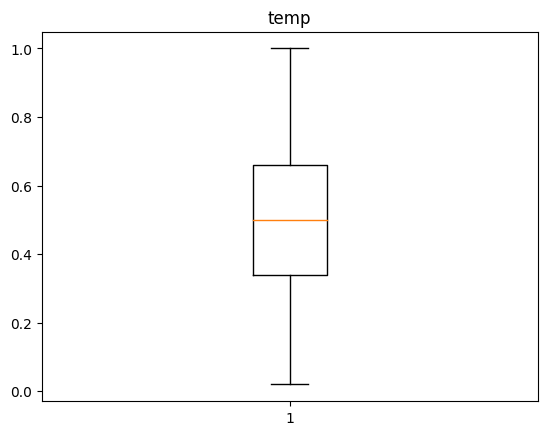

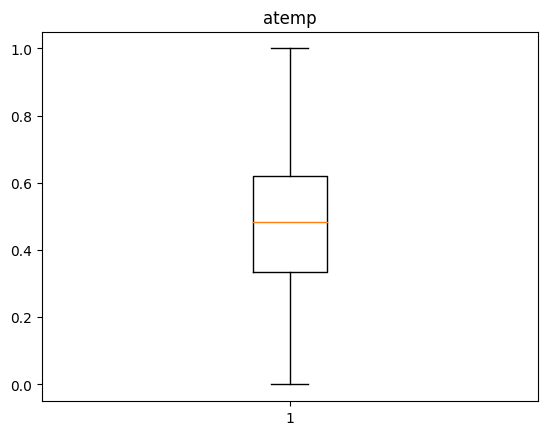

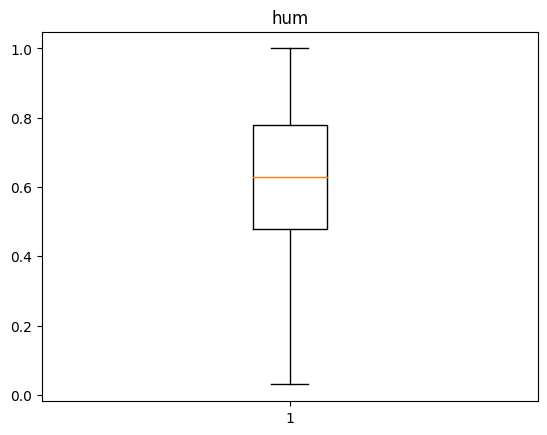

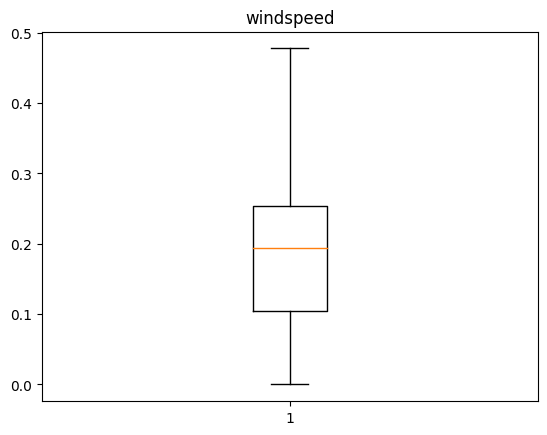

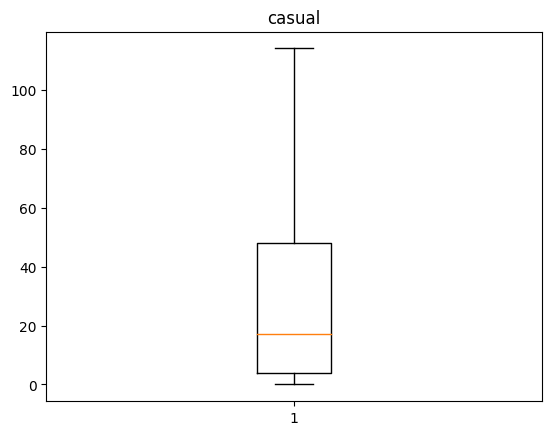

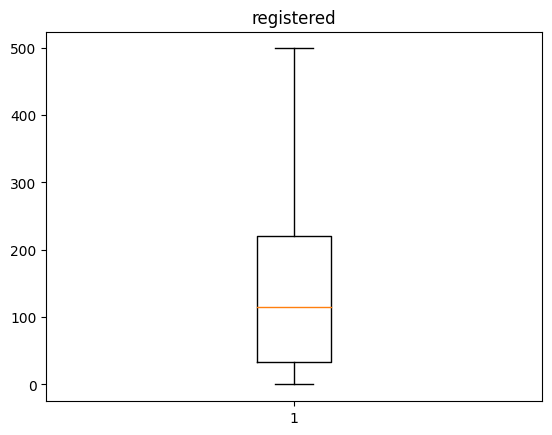

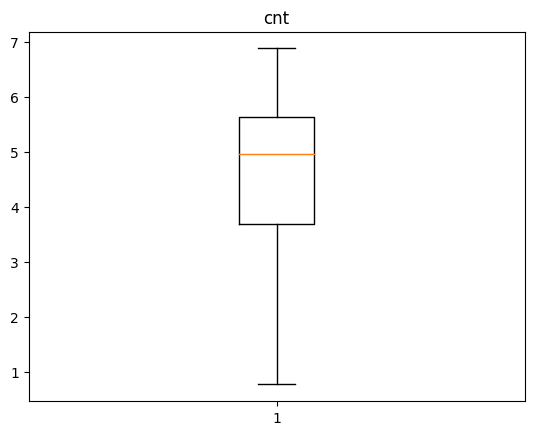

In [ ]:
#Data visualization after replacing outliers
for col in cols_to_cap:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()


Why can't we replace the outliers for categorical type columns?

Categorical data is non-numeric and consists of discrete categories or levels. It does not have a natural ordering, and so it does not make sense to apply mathematical operations such as mean, median, or standard deviation. Therefore, it is not appropriate to replace outliers in categorical data. Regarding categorical variables, it's important to note that outliers may not be as straightforward to identify and handle as they are for numerical variables. For example, if you have a categorical variable like "Season" with four categories (Spring, Summer, Fall, Winter), it may not make sense to cap or replace outliers because there are no numerical values to compare.

# **Correlation**

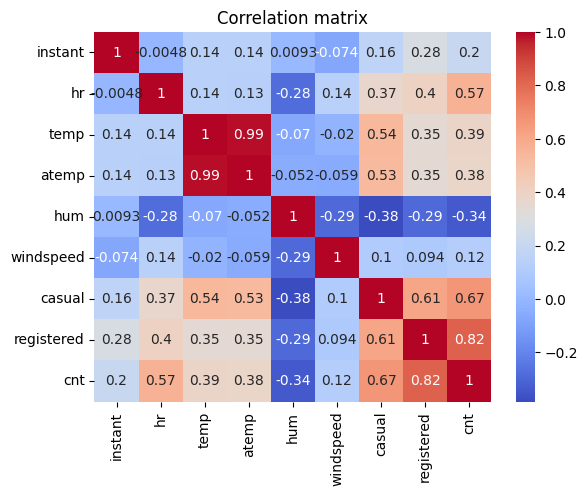

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()

The correlation graph shows that the count of total rental bikes has a strong positive correlation with the temperature, feels-like temperature (atemp), and the hour of the day. Since temperature and atemp are highly positively correlated we can drop atemp. Similarly, the cnt is highly correlated with casual , registered so we can also ignore this for future analysis.

In [ ]:
data1 = data.copy()

In [ ]:
data1.drop(['casual','registered','atemp','instant','dteday'],axis=1,inplace=True)
data1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.810000,0.0,2.772589
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.800000,0.0,3.688879
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.627208,0.0,3.465736
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.750000,0.0,2.564949
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.750000,0.0,0.764667


In [ ]:
x = data1.drop(['cnt'],axis=1)
y = data1['cnt']

# **Feature Scaling**

Feature scaling helps in avoiding the large scale range values dominating the small scale range values. All the variables in our dataset is either categorical or numerical but the temp , windspeed , atemp and hum are continous values and are needed to be normalized in order fit in the scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# select the features to be scaled
features = ['temp', 'atemp', 'hum', 'windspeed']

# fit the scaler object to the selected features
scaler.fit(data[features])

# transform the selected features using the scaler object
data[features] = scaler.transform(data[features])

In [ ]:
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.224490,0.2879,0.804124,0.0,3.0,13.0,2.772589
1,2,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.204082,0.2727,0.793814,0.0,8.0,32.0,3.688879
2,3,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.204082,0.2727,0.615678,0.0,5.0,27.0,3.465736
3,4,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.224490,0.2879,0.742268,0.0,3.0,10.0,2.564949
4,5,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.224490,0.2879,0.742268,0.0,0.0,1.0,0.764667


# **Feature Selection**

# **1.Recursive Feature Elimination:**

In [ ]:
# create new columns for year, month, and day
data['year'] = pd.DatetimeIndex(data['dteday']).year
data['month'] = pd.DatetimeIndex(data['dteday']).month
data['day'] = pd.DatetimeIndex(data['dteday']).day

# drop the original Dteday column
data = data.drop('dteday', axis=1)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['season'] = le.fit_transform(data['season'])
data['holiday'] = le.fit_transform(data['holiday'])
data['workingday'] = le.fit_transform(data['workingday'])
data['weathersit'] = le.fit_transform(data['weathersit'])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['cnt'], axis=1)
y = data['cnt']

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]

In [ ]:
print(selected_features)

Index(['instant', 'hr', 'atemp', 'casual', 'registered'], dtype='object')


# **2.Univariate Feature Selection:**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = data.drop(['cnt'], axis=1)
y = data['cnt']

best_features = SelectKBest(score_func=f_regression, k=5)
fit = best_features.fit(X, y)

selected_features = X.columns[fit.get_support()]
print(selected_features)

Index(['hr', 'temp', 'atemp', 'casual', 'registered'], dtype='object')


# **3.Tree-Based Feature Selection:**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

X = data.drop(['cnt'], axis=1)
y = data['cnt']

model = ExtraTreesRegressor()
model.fit(X, y)

importances = model.feature_importances_
selected_features = X.columns[importances > 0.05]
print(selected_features)

Index(['hr', 'casual', 'registered'], dtype='object')


# **4.L1 Regularization:**

In [ ]:
from sklearn.linear_model import Lasso

X = data.drop(['cnt'], axis=1)
y = data['cnt']

model = Lasso(alpha=0.1)
model.fit(X, y)

selected_features = X.columns[model.coef_ != 0]
print(selected_features)

Index(['instant', 'mnth', 'hr', 'casual', 'registered'], dtype='object')


# **5.SelectFromModel:**

In [ ]:
from sklearn.feature_selection import SelectFromModel

X = data.drop(['cnt'], axis=1)
y = data['cnt']

sfm = SelectFromModel(RandomForestRegressor(), threshold='mean')
sfm.fit(X, y)

print("Selected features: ", X.columns[sfm.get_support()])


Selected features:  Index(['registered'], dtype='object')


In [ ]:
from collections import Counter

# list of all selected features
selected_features = ['instant', 'hr', 'hum', 'casual', 'registered',
                     'hr', 'temp', 'atemp', 'casual', 'registered',
                     'casual', 'registered',
                     'instant', 'season', 'mnth', 'hr', 'weekday', 'workingday', 'temp', 'casual', 'registered', 'month', 'day',
                     'registered']

# count frequency of each feature
feature_counts = Counter(selected_features)

# print feature and frequency
for feature, count in feature_counts.items():
    print(feature, ":", count)


instant : 2
hr : 3
hum : 1
casual : 4
registered : 5
temp : 2
atemp : 1
season : 1
mnth : 1
weekday : 1
workingday : 1
month : 1
day : 1


In [ ]:
data.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
#Drop unnecessary columns
data.drop(['instant','yr','holiday','weathersit','windspeed'], axis=1, inplace=True)

In [ ]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [ ]:
# split data into features and target variable
X = data.drop(['cnt'], axis=1)
y = data['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [ ]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [ ]:
#model fitting
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train = X_train.astype(float)
y_train_pred = lr_model.predict(X_train)

In [ ]:
# Accuracy of the model
lr_acc = lr_model.score(X_train, y_train)
print('Accuracy of the model:', lr_acc)

# Model coefficients
lr_coef = lr_model.coef_
print('Model coefficients:', lr_coef)

# Model intercept value
lr_intercept = lr_model.intercept_
print('Model intercept value:', lr_intercept)


Accuracy of the model: 0.7784629094732154
Model coefficients: [ 3.56016798e-02  7.27159427e-03  5.24099512e-02  9.05424960e-03
 -1.13127066e-01  2.49536054e-02  5.45920940e-01 -2.65746224e-01
  6.55104707e-03  6.48295543e-03 -1.30459166e-02 -5.19669670e-03
 -8.89248881e-05]
Model intercept value: 28.885422591127167


The accuracy score of the model is  0.7784629094732154, which indicates that the model is able to predict the target variable with 77.84% accuracy.

Cross Validation

In [ ]:
#Cross validation prediction
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)
predict

array([3.77395122, 7.1493156 , 2.90772829, ..., 4.74414157, 3.54528129,
       6.63748703])

In [ ]:
X_test = X_test.astype(float)
y_test_pred = lr_model.predict(X_test)

In [ ]:
# Predict the target variable for test set
y_test_pred = lr_model.predict(X_test)

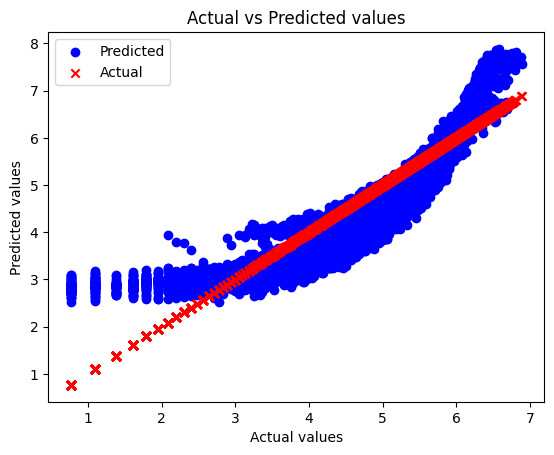

In [ ]:
plt.scatter(y_test, y_test_pred, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

R-squared and mean squared error score

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
# R-squared score for train set
r2_train = r2_score(y_train, y_train_pred)

# Mean Squared Error for train set
mse_train = mean_squared_error(y_train, y_train_pred)

print('R-squared score for train set(Linear Regression):', r2_train)
print('Mean Squared Error for train set(Linear Regression):', mse_train)


# Calculating the mean absolute error
mae_lr = np.mean(np.abs(y_train - y_train_pred))
print("Mean absolute error (Linear Regression):", mae_lr)

R-squared score for train set(Linear Regression): 0.7784629094732154
Mean Squared Error for train set(Linear Regression): 0.4770334388100667
Mean absolute error (Linear Regression): 0.5319164915029592


In [ ]:
# R-squared score for test set
r2_test = r2_score(y_test, y_test_pred)

# Mean Squared Error for test set
mse_test = mean_squared_error(y_test, y_test_pred)

print('R-squared score for test set(Linear Regression):', r2_test)
print('Mean Squared Error for test set(Linear Regression):', mse_test)

# Calculating the mean absolute error
mae_lr = np.mean(np.abs(y_test - y_test_pred))
print("Mean absolute error (Linear Regression):", mae_lr)

R-squared score for test set(Linear Regression): 0.7673034385793555
Mean Squared Error for test set(Linear Regression): 0.4903705266997957
Mean absolute error (Linear Regression): 0.5410378870161346


The R-squared score for the train set is 0.7784629, indicating that the model explains 77.84% of the variance in the dependent variable. The Mean Squared Error (MSE) for the test set is 0.477033, which means that on average, the difference between the predicted values and actual values squared is 0.531916. This error metric is used to evaluate the quality of the model's predictions. A lower value of MSE indicates better prediction accuracy.

# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Creating an instance of DecisionTreeRegressor with max_depth=5
dt_reg = DecisionTreeRegressor(max_depth=5)

# Fitting the decision tree model on the training data
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
X_train = X_train.astype(float)
y_train_pred = dt_reg.predict(X_train)

In [ ]:
# Accuracy of the model
dt_acc = dt_reg.score(X_train, y_train)
print('Accuracy of the model:', dt_acc)

Accuracy of the model: 0.9918887809848245


In [ ]:
y_test_pred = dt_reg.predict(X_test)

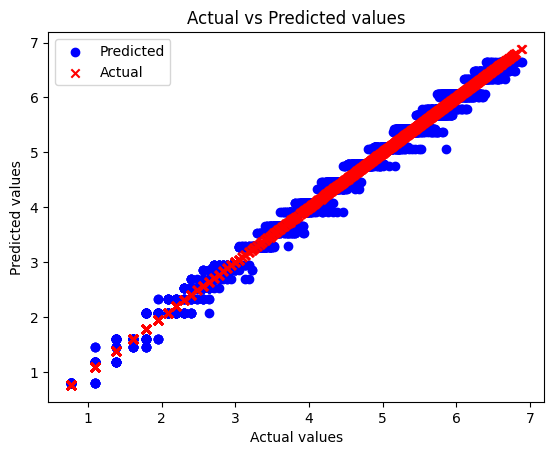

In [ ]:
plt.scatter(y_test, y_test_pred, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

The actual vs predicted graph shows how well the model is able to predict the target variable. The closer the points are to the diagonal line, the better the model's predictions are. A large deviation from the diagonal line indicates poor performance of the model.

Cross Validation

In [ ]:
dt_scores = cross_val_score(dt_reg, X_train, y_train, cv=10, scoring='r2')
print("Cross-validation scores for Decision Tree Regressor: ", dt_scores)

Cross-validation scores for Decision Tree Regressor:  [0.99120287 0.99263346 0.99053096 0.99132594 0.99166795 0.99211705
 0.99185261 0.99121132 0.99145486 0.99135242]


In [ ]:
# Calculating the R-squared score for train
r2_dt = r2_score(y_train, y_train_pred)
print("R-squared score (Decision Tree Regressor):", r2_dt)

# Calculating the mean squared error
mse_dt = mean_squared_error(y_train, y_train_pred)
print("Mean squared error (Decision Tree Regressor):", mse_dt)

# Calculating the mean absolute error
mae_dt = np.mean(np.abs(y_train - y_train_pred))
print("Mean absolute error (Decision Tree Regressor):", mae_dt)

R-squared score (Decision Tree Regressor): 0.9918887809848245
Mean squared error (Decision Tree Regressor): 0.017465800830687495
Mean absolute error (Decision Tree Regressor): 0.10476704888008348


In [ ]:
# Calculating the R-squared score for test
r2_dt = r2_score(y_test, y_test_pred)
print("R-squared score (Decision Tree Regressor):", r2_dt)

# Calculating the mean squared error
mse_dt = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Decision Tree Regressor):", mse_dt)

# Calculating the mean absolute error
mae_dt = np.mean(np.abs(y_test - y_test_pred))
print("Mean absolute error (Decision Tree Regressor):", mae_dt)

R-squared score (Decision Tree Regressor): 0.9912154069499215
Mean squared error (Decision Tree Regressor): 0.01851211506741329
Mean absolute error (Decision Tree Regressor): 0.10874150754958892


The R-squared score for the train set is 0.9918, indicating that the model explains 99.18% of the variance in the dependent variable. The Mean Squared Error (MSE) for the train set is 0.0174, which means that on average, the difference between the predicted values and actual values squared is 0.10476. This error metric is used to evaluate the quality of the model's predictions. A lower value of MSE indicates better prediction accuracy.

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict the target variable for test set
rf_y_test_pred = rf_model.predict(X_test)


In [ ]:
X_train = X_train.astype(float)
y_train_pred = rf_model.predict(X_train)

In [ ]:
# Accuracy of the model
rf_acc = rf_model.score(X_train, y_train)
print('Accuracy of the model:', rf_acc)


Accuracy of the model: 0.9999487273330482


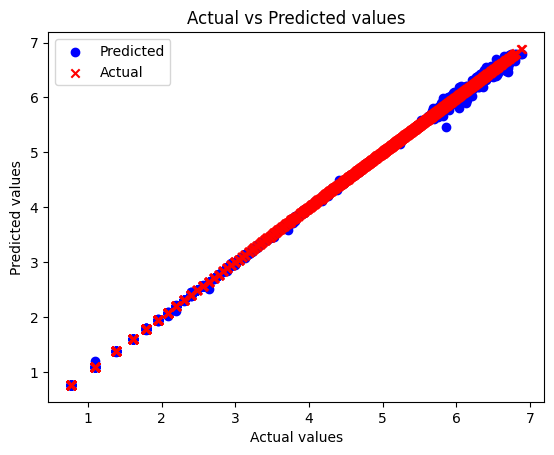

In [ ]:
plt.scatter(y_test, rf_y_test_pred, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

Cross Validation

In [ ]:
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')
print("Cross-validation scores for Random Forest Regressor: ", rf_scores)

Cross-validation scores for Random Forest Regressor:  [0.99962043 0.99969718 0.99965561 0.99948098 0.99968454 0.99952146
 0.99964851 0.99959211 0.99969434 0.99969466]


In [ ]:
# Calculate R-squared score for train
r2_score_rf = r2_score(y_train, y_train_pred)
print("R-squared score (Random Forest Regressor):", r2_score_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_train, y_train_pred)
print("Mean squared error (Random Forest Regressor):", mse_rf)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_train, y_train_pred)
print("Mean absolute error (Random Forest Regressor):", mae_rf)

R-squared score (Random Forest Regressor): 0.9999487273330482
Mean squared error (Random Forest Regressor): 0.00011040488333061835
Mean absolute error (Random Forest Regressor): 0.003954053602469922


In [ ]:
# Calculate R-squared score for test
r2_score_rf = r2_score(y_test, y_test_pred)
print("R-squared score (Random Forest Regressor):", r2_score_rf)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Random Forest Regressor):", mse_rf)

# Calculate mean absolute error
mae_rf = mean_absolute_error(y_test, y_test_pred)
print("Mean absolute error (Random Forest Regressor):", mae_rf)

R-squared score (Random Forest Regressor): 0.9912154069499215
Mean squared error (Random Forest Regressor): 0.01851211506741329
Mean absolute error (Random Forest Regressor): 0.10874150754958892


The Random Forest Regressor performed exceptionally well on the train dataset with an R-squared score of 0.9999, indicating that 99.99% of the variation in the dependent variable can be explained by the independent variables used in the model. Additionally, the mean squared error (MSE) for the model was very low at 0.0001104, which means that the predicted values were very close to the actual values. The mean absolute error (MAE) was also very low at 0.00395, indicating that the average difference between the predicted and actual values was minimal. Overall, these metrics indicate that the Random Forest Regressor model is a good fit for the bike rental dataset and can accurately predict the number of bike rentals based on the selected features.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel='linear', C=1, epsilon=0.1)

# Train the model on the train set
svr_model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [ ]:
# Predict the target variable for test set
y_test_pred_svr = svr_model.predict(X_test)

In [ ]:
X_train = X_train.astype(float)
y_train_pred = svr_model.predict(X_train)

In [ ]:
# Accuracy of the model
svr_acc = svr_model.score(X_train, y_train)
print('Accuracy of the model:', svr_acc)

# Model coefficients
svr_coef = svr_model.coef_
print('Model coefficients:', svr_coef)

# Model intercept value
svr_intercept = svr_model.intercept_
print('Model intercept value:', svr_intercept)

Accuracy of the model: -580.9639137577453
Model coefficients: [[ 3.32920870e+00  8.11765406e-01  1.71850911e-01 -2.12529388e-01
  -7.61517755e+00  2.60230144e+01  2.96036227e+01  2.72967893e+01
  -3.50227609e-01  2.13449037e-02 -5.86042902e-01 -2.77209054e+00
  -2.61029695e-01]]
Model intercept value: [1195.60727264]


Cross Validation

In [ ]:
# Perform cross-validation with 5 folds and using R-squared as scoring metric
scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')

# Print the scores
print('Cross-validation scores:', scores)

Cross-validation scores: [-613.79628942 -883.05125329 -333.76687831 -409.42770637 -697.28046075]


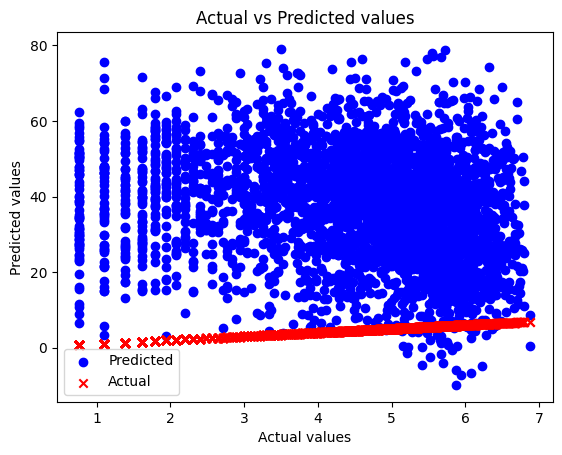

In [ ]:
plt.scatter(y_test, y_test_pred_svr, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

In [ ]:
# Calculate model evaluation metrics for train 
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

# Print the model evaluation metrics
print("R-squared score (SVR):", r2)
print("Mean squared error (SVR):", mse)
print("Mean absolute error (SVR):", mae)

R-squared score (SVR): -580.9639137577453
Mean squared error (SVR): 1253.1366480578456
Mean absolute error (SVR): 32.32574851888152


In [ ]:
# Calculate model evaluation metrics for test 
r2 = r2_score(y_test, y_test_pred_svr)
mse = mean_squared_error(y_test, y_test_pred_svr)
mae = mean_absolute_error(y_test, y_test_pred_svr)

# Print the model evaluation metrics
print("R-squared score (SVR):", r2)
print("Mean squared error (SVR):", mse)
print("Mean absolute error (SVR):", mae)

R-squared score (SVR): -603.9804215367342
Mean squared error (SVR): 1274.898804438083
Mean absolute error (SVR): 32.65213330960834


The Support Vector Regressor (SVR) model has resulted in a negative R-squared score of -580.96, indicating that the model is performing very poorly on the train data. The Mean Squared Error (MSE) for this model is 1253.13, which is quite high compared to the other models we have evaluated. The Mean Absolute Error (MAE) for this model is 32.32, which indicates that, on average, the predicted values deviate from the actual values by around 32.32 units. This poor performance suggests that the SVR model is not a good fit for the given dataset, and we should try other models for better results.

# **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Create gradient boosting regressor model and fit to training data
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
X_train = X_train.astype(float)
y_train_pred = gbm_model.predict(X_train)

In [ ]:
# Accuracy of the model
gbm_acc = gbm_model.score(X_train, y_train)
print('Accuracy of the model:', gbm_acc)


Accuracy of the model: 0.9991618559939296


In [ ]:
y_test_pred = gbm_model.predict(X_test)

In [ ]:
# Use cross-validation to evaluate model performance
cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring='r2')
cv_r2 = cv_scores.mean()

print("Cross-validation R-squared score (Gradient Boosting): {:.3f}".format(cv_r2))

Cross-validation R-squared score (Gradient Boosting): 0.999


In [ ]:
# calculate R-squared for training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# calculate MSE for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# print results
print("Training Set R-squared score (Gradient Boosting): {:.4f}".format(r2_train))
print("Testing Set R-squared score (Gradient Boosting): {:.4f}".format(r2_test))
print("Training Set Mean Squared Error (Gradient Boosting): {:.4f}".format(mse_train))
print("Testing Set Mean Squared Error (Gradient Boosting): {:.4f}".format(mse_test))

Training Set R-squared score (Gradient Boosting): 0.9992
Testing Set R-squared score (Gradient Boosting): 0.9992
Training Set Mean Squared Error (Gradient Boosting): 0.0018
Testing Set Mean Squared Error (Gradient Boosting): 0.0018


The R-squared score for the train set is 0.9992, indicating that the model explains 99.92% of the variance in the dependent variable. The Mean Squared Error (MSE) for the train set is 0.0018.  A lower value of MSE indicates better prediction accuracy.

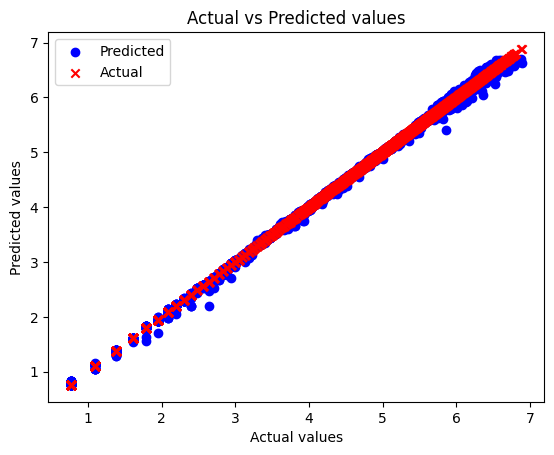

In [ ]:
plt.scatter(y_test, y_test_pred, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

# **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
# Create XGBoost model
xgb_model = xgb.XGBRegressor()

# Train model on training set
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_test_pred = xgb_model.predict(X_test)

In [ ]:
X_train = X_train.astype(float)
y_train_pred = xgb_model.predict(X_train)

In [ ]:
# Accuracy of the model
xgb_acc = xgb_model.score(X_train, y_train)
print('Accuracy of the model:', xgb_acc)


Accuracy of the model: 0.9999010193157533


Cross Validation

In [ ]:
# Perform 5-fold cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Calculating the R-squared score and MSE for the training set
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

# Printing the results
print(f"Training Set R-squared score (XGBoost): {r2_train}")
print(f"Training Set Mean Squared Error (XGBoost): {mse}")
print(f"Training Set Mean Absolute Error score (XGBoost): {mae}")

Training Set R-squared score (XGBoost): 0.9999010193157533
Training Set Mean Squared Error (XGBoost): 0.0002131340448215561
Training Set Mean Absolute Error score (XGBoost): 0.009663685936759068


In [ ]:
# Calculating the R-squared score and MSE for the test set
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Printing the results
print(f"Test Set R-squared score (XGBoost): {r2_test}")
print(f"Test Set Mean Squared Error (XGBoost): {mse}")
print(f"Test Set Mean Absolute Error score (XGBoost): {mae}")

Test Set R-squared score (XGBoost): 0.999657892196525
Test Set Mean Squared Error (XGBoost): 0.0007209370983135012
Test Set Mean Absolute Error score (XGBoost): 0.015206000904287947


The XGBoost model was tested and evaluated on the train set. The R-squared score was found to be 0.9999, indicating that the model explains 99.99% of the variance in the target variable. The Mean Squared Error (MSE) score was found to be 0.0002131, indicating that the average squared difference between the predicted and actual values is very low. The Mean Absolute Error (MAE) score was found to be 0.0096636, indicating that the average absolute difference between the predicted and actual values is also low. These scores suggest that the XGBoost model is performing very well on the train set.

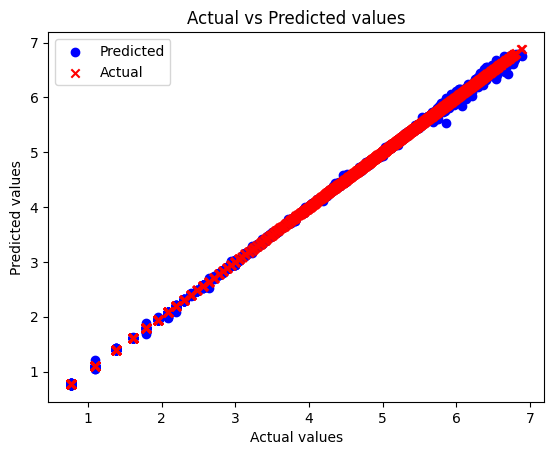

In [ ]:
plt.scatter(y_test, y_test_pred, marker='o', color='b', label='Predicted')
plt.scatter(y_test, y_test, marker='x', color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted values')
plt.show()

# **Model Tuning**

In [ ]:
# Set up the parameter grid for each model
lr_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

dt_param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "criterion": ["squared_error"]
}
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
gbm_param_grid= {
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators': [100,500,1000],
    'max_depth': [3,7,5],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}
xgb_param_grid= {
    'learning_rate': [0.1,0.01,0.001],
    'n_estimators': [100,500,1000],
    'max_depth': [3,7,5],
    'colsample_bytree': [0.5,0.7,0.9],
    'subsample': [0.5,0.7,0.9],
    'reg_alpha': [1e-5,1e-2,0.1,1,100],
    'reg_lambda': [1e-5,1e-2,0.1,1,100]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_random = RandomizedSearchCV(rf_model, param_distributions=rf_param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [None, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [ ]:
lr_cv = RandomizedSearchCV(lr_model, lr_param_grid, cv=5, n_iter=10, n_jobs=-1)

In [ ]:
dt_cv = RandomizedSearchCV(dt_reg, dt_param_grid, cv=5, n_iter=10, n_jobs=-1)

In [ ]:
svm_cv = RandomizedSearchCV(svr_model, svm_param_grid, cv=5, n_iter=10, n_jobs=-1)

In [ ]:
gbm_cv = RandomizedSearchCV(gbm_model,gbm_param_grid, cv=5, n_iter=10, n_jobs=-1)

In [ ]:
xgb_cv = RandomizedSearchCV(xgb_model,xgb_param_grid, cv=5, n_iter=10, n_jobs=-1)

In [ ]:
# Fit the models to the training data
lr_cv.fit(X_train, y_train)
dt_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=5),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [2, 5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [ ]:
svm_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(C=1, kernel='linear'), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [ ]:
## Fit the models to the training data
gbm_cv.fit(X_train, y_train)
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 7, 5],
                                        'n_estimators': [100, 500, 1000],
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1,
                                                       100],
                                        'subsample': [0.5, 0.7, 0.9]})

In [ ]:
# Print the best hyperparameters and best scores for each model
print('Linear Regression:')
print('Best Parameters:', lr_cv.best_params_)
print('Best Score:', lr_cv.best_score_)

print('Decision Tree Regression:')
print('Best Parameters:', dt_cv.best_params_)
print('Best Score:', dt_cv.best_score_)

print('Random Forest Regression:')
print('Best Parameters:', rf_random.best_params_)
print('Best Score:', rf_random.best_score_)

print('Support Vector Regression:')
print('Best Parameters:', svm_cv.best_params_)
print('Best Score:', svm_cv.best_score_)

print('Gradient Boosting Regression: ')
print('Best Parameters:', gbm_cv.best_params_)
print('Best Score:', gbm_cv.best_score_)

print('XGBoost: ')
print('Best Parameters:', xgb_cv.best_params_)
print('Best Score:', xgb_cv.best_score_)

Linear Regression:
Best Parameters: {'positive': False, 'fit_intercept': False, 'copy_X': True}
Best Score: 0.7779705509806298
Decision Tree Regression:
Best Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'friedman_mse'}
Best Score: 0.9668177733083269
Random Forest Regression:
Best Parameters: {'n_estimators': 200, 'max_depth': None, 'criterion': 'squared_error'}
Best Score: 0.9996069035666995
Support Vector Regression:
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Score: 0.8553045680464942
Gradient Boosting Regression: 
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.9996954673728371
XGBoost: 
Best Parameters: {'subsample': 0.5, 'reg_lambda': 0.01, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score: 0.9992080825292853


The results of the hyperparameter tuning show that the Random Forest Regression model performed the best with a score of 0.9996. This suggests that the Random Forest Regression model was able to fit the data very closely and accurately.

The Linear Regression model performed the worst with a score of 0.7788, indicating that it was not able to capture the underlying patterns in the data very well.

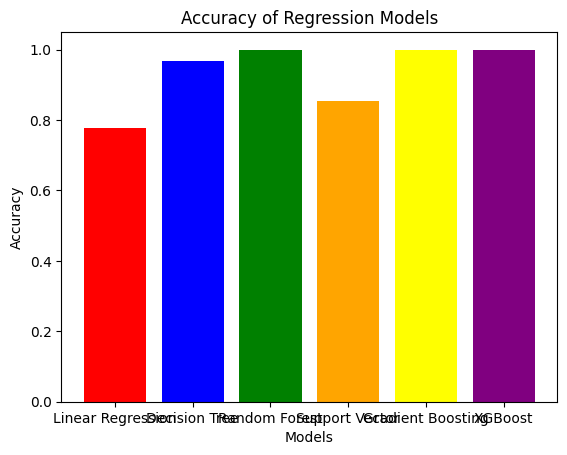

In [ ]:
# Collect the best scores of all the models
scores = [lr_cv.best_score_, dt_cv.best_score_, rf_random.best_score_, svm_cv.best_score_, gbm_cv.best_score_, xgb_cv.best_score_]

# Set the names of the models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'Gradient Boosting', 'XGBoost']

colors = ['red', 'blue', 'green', 'orange', 'yellow', 'purple']

# Plot the scores as a bar chart
plt.bar(model_names, scores, color=colors)

# Add labels and title to the chart
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Regression Models')

# Display the chart
plt.show()

In [ ]:
import pickle

In [ ]:
filename = "final_model.sav"

In [ ]:
pickle.dump(xgb_model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('final_model.sav' , 'rb'))

In [ ]:
ls

 bike_rent.csv    'F:\MinMaxScaler.pkl'  'F:\xgb_model.pkl'
 final_model.sav  'F:\ohe.pkl'            sample_data/
